<a href="https://colab.research.google.com/github/ayodejioogunseye/Machine-Learning-Projects/blob/main/Sentimental_Analysi_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #To load the data
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import re #To remove the unwanted words
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from keras.models import Sequential
from keras.layers import Conv1D,Embedding,Dense,MaxPool1D,LSTM,Dropout
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

#!pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np
!pip install squarify
import squarify    # pip install squarify (algorithm for treemap)
!pip install wordcloud
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense,  LSTM, Conv1D, MaxPooling1D, Dropout, Activation
import tensorflow as tf 
from bs4 import BeautifulSoup
!pip install contractions
import sys  
!{sys.executable} -m pip install contractions
import pickle
# import library
import contractions
!pip install unidecode
import unidecode
import collections
from itertools import islice
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

Import and Load Dataset from CSV file


In [ ]:
##read file
data_raw = pd.read_csv(r'dataset.csv',encoding='utf8' ) #Load the data
#data.drop(['id'],inplace = True,axis = 1) # Remove the column 'id' which is not usefull for predicting the label
data_raw.shape



(937854, 3)

In [ ]:
data_raw.head(5) 

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


Filter dataset to include only English tweets: canadian and Uk English

In [ ]:
locale=["en","ca"]
data_1 = data_raw[data_raw["Language"].isin(locale)]

print('Tweets size after filtering Canadian and English tweets:', data_raw.shape)

Tweets size after filtering Canadian and English tweets: (937854, 3)


Filter dataset composing of just 'EN' and 'CA' language locale.

In [ ]:
data_1.head(5)

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
5,It sucks for me since I'm focused on the natur...,en,negative


There are four class labels we will predict: positive,litigious, negative or uncertain.)¶

In [ ]:

sentiments = data_1['Label'].unique()
sentiments


array(['litigious', 'positive', 'negative', 'uncertainty'], dtype=object)

Showing No of Tweets in dataset : 872242 rows × 3 columns

In [ ]:
data_1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
data_1.shape
data_1.reset_index(drop=True)
data_1.count

<bound method DataFrame.count of                                                      Text Language      Label
0       @Charlie_Corley @Kristine1G @amyklobuchar @Sty...       en  litigious
2       https://t.co/YJNiO0p1JV Flagstar Bank disclose...       en  litigious
3       Rwanda is set to host the headquarters of Unit...       en   positive
4       OOPS. I typed her name incorrectly (today’s br...       en  litigious
5       It sucks for me since I'm focused on the natur...       en   negative
...                                                   ...      ...        ...
937849            @Juice_Lemons in the dark. it’s so good       en   positive
937850  8.SSR &amp; Disha Salian case should be solved...       en   negative
937851  *ACCIDENT:  Damage Only* - Raleigh Fire Depart...       en   negative
937852  @reblavoie So happy for her! She’s been incred...       en   positive
937853                         I'm lost and I'm found but       en   negative

[872242 rows x 3 columns]>

Breakdwon of each sentiments counts in dataset

In [ ]:
data_1.Label.value_counts()

positive       248597
negative       244454
uncertainty    198906
litigious      180285
Name: Label, dtype: int64

Analysis of Sentiments¶

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


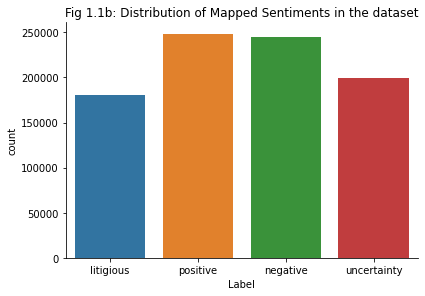

In [ ]:
sns.factorplot(x='Label', data=data_1, kind="count", size=4, aspect=1.5)
plt.title('Fig 1.1b: Distribution of Mapped Sentiments in the dataset')
plt.show();

Remove Unwanted column i.e Language column


Taking Fraction of Dataset for Processing to allow quick execution¶
#
To increase Dataset size, set Frac to Higer value

In [ ]:
dataset = data_1.sample(frac = 0.02, replace = False, random_state=42)
dataset.reset_index(drop=True)

,Text,Language,Label
0,Incredible 😂 https://t.co/kgLE4HCJWY,en,positive
1,Looks like witness tampering by Trumpistas is ...,en,litigious
2,"Yay, I was finally able to order a PS5! SO exc...",en,positive
3,Incredible! https://t.co/u7Mh8H4gvE,en,positive
4,the way i would literally fight to the death f...,en,negative
...,...,...,...
17440,"Yeayy!!! so excited for this, can't wait😛 #ฟรี...",en,positive
17441,@vhallblms @Texabaman @JillaNmanilla @KaivanSh...,en,negative
17442,"Did this on IG but I’ll do this on here, ask m...",en,negative
17443,Case Study - Federated privacy preserving anal...,en,positive


Data Cleaning(POS tagging, Stop word removal,Stemmatization,lemmatization, tokenization)¶


In [ ]:

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
  

    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
   
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
  
    return(text)

# clean text 
dataset["Text"] = dataset["Text"].apply(lambda x: clean_text(x))



In [ ]:
dataset['Text'].head(20)

84757                                       incredible http
635358      look like witness tamper trumpistas next agenda
217705                        yay finally able order excite
151602                                      incredible http
597951    way would literally fight death ticket absolut...
631858    luke roux farmington ct car accident find happ...
813570           good bro much ruin put enough perfect http
572398                           give aespacore excite http
251853    interested establish digital knowledge center ...
203274    toothtakei coolauntclaire mkornheiser jbabsspo...
771471    cbdsugars think really deserve response honest...
341899    leahoneywine dthrocket lol yes sometimes easy ...
713562    alecbaldwin love innovation aviation even stan...
25885                               bad bitch well pop http
814824    care probably chlamydia would hug love one lit...
782324    donaldjtrumpjr today bad day pop gop sycophant...
100275    suppose get couch new desk apa

In [ ]:
from collections import Counter
cnt = Counter()
for text in dataset["Text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)
cm = cnt.most_common(20)
cm


[('http', 5771),
 ('get', 2056),
 ('go', 1586),
 ('like', 1568),
 ('would', 1416),
 ('good', 1367),
 ('make', 1366),
 ('one', 1217),
 ('people', 1185),
 ('think', 1156),
 ('say', 1136),
 ('know', 1089),
 ('want', 969),
 ('time', 949),
 ('bad', 926),
 ('see', 837),
 ('law', 806),
 ('might', 783),
 ('best', 769),
 ('take', 769)]

Taking Some Data for CHECKING PREDICTION AFTER EVALUATION OF ALGORITHM: PredictData(4rows)

In [ ]:
#Overview of Cleaned Dataset¶
dataset['Text'].head(20)

0                       incredible 😂 httpstcokgle4hcjwy
1     look like witness tamper trumpistas next jan6c...
2                   yay finally able order ps5 excite 🥹
3                         incredible httpstcou7mh8h4gve
4     way would literally fight death ticket wasn’t ...
5     luke roux farmington ct car accident find happ...
6     drkoolaidman1 good bro much ruin put enough pe...
7           give aespacore im excite httpstcovguoaecwn0
8     interested establish digital knowledge center ...
9     toothtakei r3t2 coolauntclaire mkornheiser jba...
10    cbdsugars dont think really deserve response t...
11    leahoneywine mitumba10 dthrocket lol yes somet...
12    alecbaldwin love innovation aviation even stan...
13                bad bitch well pop httpstcozlwbbg3arf
14    don’t care probably chlamydia would hug love o...
15    donaldjtrumpjr today bad day pop gop sycophant...
16    im suppose get couch new desk apartment weeken...
17    wrongspeak black people aren’t capable suc

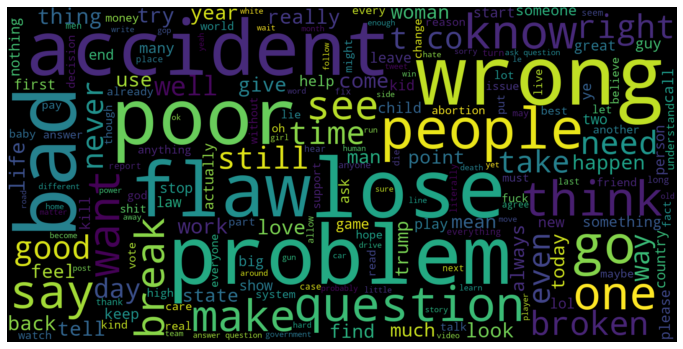

In [ ]:
neg_reviews = dataset[dataset.Label == 'negative']
neg_string = []
for t in neg_reviews.Text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

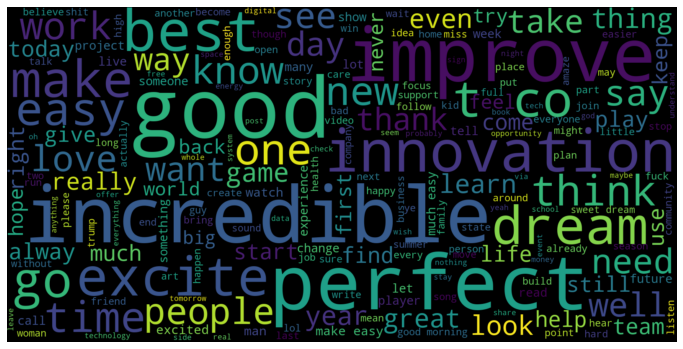

In [ ]:
pos_reviews = dataset[dataset.Label == 'positive']
pos_string = []
for t in pos_reviews.Text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Common Litigious words  in dataset sample

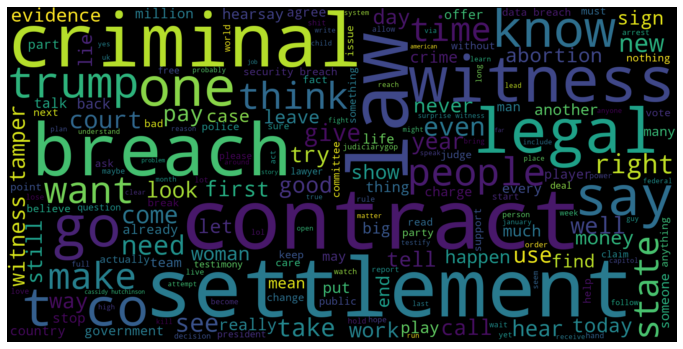

In [ ]:
lit_reviews = dataset[dataset.Label == 'litigious']
lit_string = []
for t in lit_reviews.Text:
    lit_string.append(t)
lit_string = pd.Series(lit_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(lit_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Common Uncertainity words

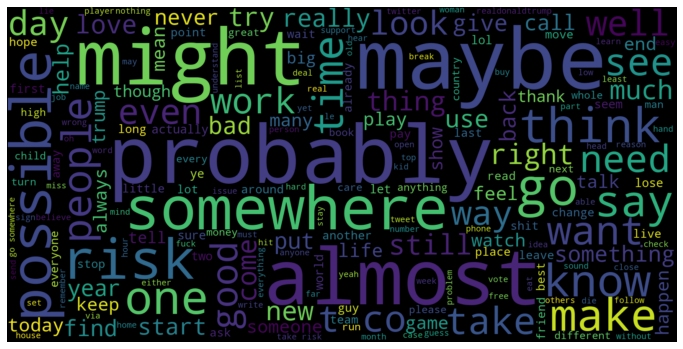

In [ ]:
unc_reviews = dataset[dataset.Label == 'uncertainty']
unc_string = []
for t in unc_reviews.Text:
    unc_string.append(t)
unc_string = pd.Series(unc_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(unc_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:

#Taking Some Data for CHECKING PREDICTION AFTER EVALUATION OF ALGORITHM: PredictData(4rows)
DatasetTrain,PredictData = train_test_split(dataset,test_size=0.00010)
DatasetTrain.reset_index(drop=True, inplace=True)



In [ ]:
PredictData.reset_index(drop=True, inplace=True)
DatasetTrain.head()

,Text,Language,Label
0,candicelikesyou dog poop inside would security...,en,litigious
1,beauty comrade catfish surely could look drink...,en,positive
2,billpegs sarahlhl also believe same-sex marria...,en,litigious
3,darthchillash insomniacgames playstation yes g...,en,uncertainty
4,uncle jimbo hell everything legal mexico ameri...,en,litigious


New Dataset (Datato be Split into Train and Test Dataset

In [ ]:
#Split the data into train input and test_input

from sklearn.model_selection import train_test_split
X = pd.DataFrame(DatasetTrain["Text"])
Y = pd.DataFrame(DatasetTrain["Label"])
train_X,test_X,train_Y, test_Y = train_test_split(X, Y,test_size=0.30)##FOR Logistics Regresssion Model
train_X1,test_X1,train_Y1, test_Y1 = train_test_split(X, Y,test_size=0.30) ##for KNN
train_x ,test_x,train_y ,test_y =  train_test_split(X, Y,test_size=0.30) ##for LSTM


Checking Shape of Pairs of Train and Test Dataset for each Algorithm

In [ ]:
train_X.shape ,train_Y.shape , test_X.shape ,test_Y.shape,test_y.shape, test_x.shape, train_y.shape, train_x.shape,train_bi.shape ,test_bi.shape,train_bi.shape ,test_bi.shape

((12210, 1),
 (12210, 1),
 (5233, 1),
 (5233, 1),
 (5233, 1),
 (5233, 1),
 (12210, 1),
 (12210, 1),
 (12210, 1),
 (5233, 1),
 (12210, 1),
 (5233, 1))

TF-IDF VECTORIZATION MODELING

In [ ]:
# Import Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=2000 ,stop_words='english') 
train_vector = vectorizer.fit_transform(train_X['Text'])
test_vector = vectorizer.transform(test_X["Text"])
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print("train_X:\n{}".format(repr(train_X)))
print("test_X: \n{}".format(repr(test_X)))



Vocabulary size: 2000
train_X:
                                                    Text
10153  crunchylink think cornyn scumbag wrong let exp...
2189   molenaide white seem coco really understood ma...
4479   innovative energy storage startup win sponsors...
13316                shannonsharpe guess skip lose phone
2040   mayoisspicyy treason witness tamper incite vio...
...                                                  ...
11567  wbrettwilson omg give ef'n head shake know get...
13660  christian_ham good question send sort rabbit t...
4806   iagov reynolds announce light scotus overturn ...
7228   rawlsgotitright howbouttomorrow noahpinion def...
8075   mimithenerd currently watch something call fai...

[12210 rows x 1 columns]
test_X: 
                                                    Text
5269   christian brother sister time honest conversat...
3858     oceanjvn saw say somewhere photobook tier print
7401   correct plus imagery would absolutely epic red...
16849  repmattgaetz un

In [ ]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print('length of vocabulary=',len(vectorizer.vocabulary_))


Number of features: 2000
length of vocabulary= 2000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Sample generated featuresfrom dataset¶


In [ ]:
##first 50 Vocabs
vectorizer.get_feature_names_out()[:50]

array(['ability', 'able', 'abortion', 'abortion legal', 'absolute',
       'absolutely', 'abuse', 'accelerate', 'accept', 'access',
       'accident', 'accident http', 'accord', 'account', 'accountability',
       'accountable', 'accurate', 'accuse', 'achieve', 'act', 'act like',
       'action', 'active', 'activist', 'activity', 'actor', 'actual',
       'actually', 'ad', 'add', 'addition', 'address', 'administration',
       'admit', 'adopt', 'adoption', 'adult', 'advantage', 'adventure',
       'advice', 'af', 'affect', 'afraid', 'africa', 'afternoon', 'age',
       'agency', 'agenda', 'agent', 'ago'], dtype=object)

In [ ]:
##first 50 Vocabs
vectorizer.get_feature_names_out()[:50]

array(['ability', 'able', 'abortion', 'abortion legal', 'absolute',
       'absolutely', 'abuse', 'accelerate', 'accept', 'access',
       'accident', 'accident http', 'accord', 'account', 'accountability',
       'accountable', 'accurate', 'accuse', 'achieve', 'act', 'act like',
       'action', 'active', 'activist', 'activity', 'actor', 'actual',
       'actually', 'ad', 'add', 'addition', 'address', 'administration',
       'admit', 'adopt', 'adoption', 'adult', 'advantage', 'adventure',
       'advice', 'af', 'affect', 'afraid', 'africa', 'afternoon', 'age',
       'agency', 'agenda', 'agent', 'ago'], dtype=object)

Visual view of features and corresponding embedding

In [ ]:
train_X.iloc[600]

Text    super honor award brainz magazine crea global ...
Name: 8927, dtype: object

In [ ]:
train_vector.toarray()[600][:300]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Confirming dimension of train and Test vector embedding and train set label are same¶

In [ ]:
train_vector.shape , train_Y.shape

((12210, 2000), (12210, 1))

In [ ]:
test_vector.shape, test_X.shape

((5233, 2000), (5233, 1))

1. MULTINOMIAL LOGISTIC REGRESSION MODEL (MLRM)

Accuracy Test: 93.52%
F1 Score: 0.94
              precision    recall  f1-score   support

   litigious       0.96      0.95      0.95      1073
    negative       0.94      0.94      0.94      1444
    positive       0.95      0.95      0.95      1481
 uncertainty       0.89      0.90      0.90      1235

    accuracy                           0.94      5233
   macro avg       0.94      0.93      0.94      5233
weighted avg       0.94      0.94      0.94      5233



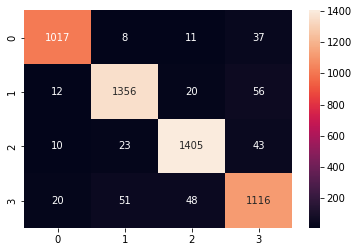

In [ ]:
from sklearn.metrics import f1_score
## ##Machine Learning Training USING tdfif,0.9603636065842274
#with class-weight='balanced'
mlr = LogisticRegression(max_iter=400 ,class_weight='balanced',multi_class ='multinomial',solver='lbfgs')
mlr.fit(train_vector, train_Y.values.ravel())
pred_test = mlr.predict(test_vector)

#from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print("Accuracy Test: {:.2f}%".format(accuracy_score(pred_test, test_Y) * 100))
print("F1 Score: {:.2f}".format(f1_score(test_Y, pred_test,average="weighted") ))


##print("\nCOnfusion Matrix:\n", confusion_matrix(test_Y, pred_test))
print(metrics.classification_report( test_Y, pred_test))
sns.heatmap(metrics.confusion_matrix(test_Y, pred_test),fmt ='d',annot = True)

Visual checking of predictions for Train dataset

In [ ]:
pred_test[15:20],test_X[15:20]

(array(['uncertainty', 'positive', 'litigious', 'positive', 'positive'],
       dtype=object),                                                    Text
 5688                                      want go drive
 8310                     tip improve pronunciation http
 7019  signeveryone mailsport year contract leave wou...
 4556  celebrate year title ix incredible panel olymp...
 4036  turdfergustan laurenboebert make easy get an.a...)

Inference:
Accuracy is good for the MLRM models Recall or Sensitivity is very low for Minority classes The models predicts well on Majority sentiments

2 KNN Algorithm

In [ ]:
##KNeighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
history = knn.fit(train_vector,train_Y1)
pred_test_1 = knn.predict(test_vector)
print("Accuracy Test: {:.2f}%".format(accuracy_score(pred_test, test_Y1) * 100))
print("F1: ",round(metrics.f1_score(test_Y1, pred_test_1,average='macro'),4))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Test: 25.15%
F1:  0.2389


Accuracy Test: 25.49%
F1 Score: 0.25
              precision    recall  f1-score   support

   litigious       0.19      0.17      0.18      1091
    negative       0.27      0.43      0.33      1460
    positive       0.29      0.22      0.25      1505
 uncertainty       0.23      0.17      0.20      1177

    accuracy                           0.25      5233
   macro avg       0.25      0.25      0.24      5233
weighted avg       0.25      0.25      0.25      5233



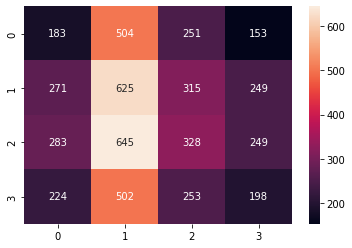

In [ ]:
#from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print("Accuracy Test: {:.2f}%".format(accuracy_score(pred_test_1, test_Y1) * 100))
print("F1 Score: {:.2f}".format(f1_score(test_Y, pred_test_1,average="weighted"),4 ))

print(metrics.classification_report( test_Y1, pred_test_1))
sns.heatmap(metrics.confusion_matrix(test_Y1, pred_test_1),fmt ='d',annot = True)

Examining prediticted Tweets

```
# This is formatted as code
```



In [ ]:
pred_test_1[1:20],test_X1[1:20]

(array(['litigious', 'positive', 'uncertainty', 'positive', 'negative',
        'positive', 'negative', 'negative', 'negative', 'negative',
        'uncertainty', 'negative', 'negative', 'positive', 'negative',
        'positive', 'litigious', 'positive', 'negative'], dtype=object),
                                                     Text
 2717   conway co lane clear eb near mile marker block...
 13269  dccra therickwilson look take joe testify hunt...
 222    faventm krisabah benhundeyin murder accident l...
 8814   realmichaelkay would mr steinbrenner reaction ...
 8977   cnn jaredkushner israeli first place might ame...
 11145  yeahthatsneef happen best happen leo cool talk...
 4943             month la month nyc might need new dream
 1808   never get tired edits taylor swift song good h...
 15612  edgeworthtwo actually hat first play find acci...
 1495   omauk futsheriff criminal__x start march barel...
 2559   wat_the_deuce eric clapton peter green richie ...
 8516   also person 

3 LSTM Algorithm

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
!pip install pydot
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#factorize the data i.e covert the text into numbers
sentiment_label = pd.get_dummies(dataset['Label']).values
sentiment_label.shape
y_train,y_test = train_test_split(sentiment_label,test_size = 0.30)
y_train.shape ,y_test.shape,sentiment_label.shape
y_trainwitlabel, y_testwithLabel = train_test_split(dataset['Label'],test_size = 0.30)

In [ ]:
train_x.shape, y_train.shape

((12211, 200), (5234, 200))

Encode the tweets and padding to max 200 vector length

In [ ]:
#tokenize the sentences i.e. break them down into smaller bits
statement = dataset.Text
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(statement)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(statement)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
x_train_pad ,x_test_pad =  train_test_split(padded_sequence,test_size=0.30)
x_train_pad = np.array(x_train_pad)
x_test_pad = np.array(x_test_pad)
x_train_pad.shape,x_test_pad.shape

((12211, 200), (5234, 200))

AttributeError: ignored

Build the LSTM Model

In [ ]:
embedding_vector_length =128
model = Sequential() 
model.add(Embedding(2000, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))

model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
  #model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.add(Dense(4, activation='sigmoid')) 
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy']) 
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 128)          256000    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 200, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 305,668
Trainable params: 305,668
Non-trainable params: 0
________________________________________________

Train the LSTM Model

In [ ]:
history_ = model.fit(x_train_pad, np.array(y_train), epochs=10)

Epoch 1/10
382/382 [==============================] - 121s 315ms/step - loss: 1.3857 - accuracy: 0.2838
Epoch 2/10
382/382 [==============================] - 116s 304ms/step - loss: 1.3706 - accuracy: 0.3120
Epoch 3/10
382/382 [==============================] - 116s 304ms/step - loss: 1.3635 - accuracy: 0.3194
Epoch 4/10
382/382 [==============================] - 118s 309ms/step - loss: 1.3551 - accuracy: 0.3316
Epoch 5/10
382/382 [==============================] - 117s 305ms/step - loss: 1.3425 - accuracy: 0.3449
Epoch 6/10
382/382 [==============================] - 117s 306ms/step - loss: 1.3358 - accuracy: 0.3517
Epoch 7/10
382/382 [==============================] - 115s 302ms/step - loss: 1.3238 - accuracy: 0.3630
Epoch 8/10
 25/382 [>.............................] - ETA: 1:46 - loss: 1.3059 - accuracy: 0.3800

In [ ]:
pred_test = model.predict(x_test_pad,batch_size =128)
pred_test = np.round( pred_test).astype(int)

41/41 [==============================] - 5s 105ms/step


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print(metrics.classification_report(y_true = y_test,y_pred = pred_test))
#from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print("Accuracy Test: {:.2f}%".format(accuracy_score(pred_test, y_test) * 100))
#sns.heatmap(metrics.confusion_matrix(y_test, pred_test),fmt ='d',annot = True)

              precision    recall  f1-score   support

           0       0.22      0.20      0.21      1131
           1       0.29      0.78      0.42      1500
           2       0.28      0.77      0.41      1442
           3       0.22      0.40      0.29      1161

   micro avg       0.27      0.57      0.36      5234
   macro avg       0.25      0.54      0.33      5234
weighted avg       0.26      0.57      0.34      5234
 samples avg       0.27      0.57      0.36      5234

Accuracy Test: 3.57%


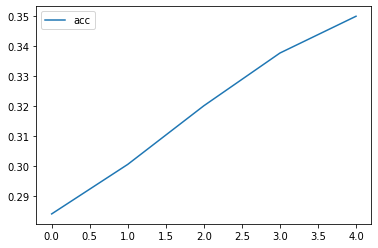

In [ ]:
plt.plot(history_.history['accuracy'], label='acc')
plt.legend()
plt.show()

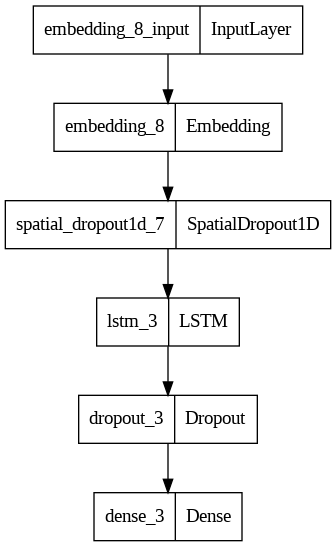

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
score = model.evaluate(x_test_pad, y_test, batch_size=128)
print ('LSTM test accuracy:', score[1]*100)

41/41 [==============================] - 4s 100ms/step - loss: 1.4091 - accuracy: 0.2721
LSTM test accuracy: 27.206724882125854
